Test data

In [2]:
from workflow.params import LOCAL_DATA_PATH
import pandas as pd

In [4]:
!pwd

/home/remi/code/TheLab75/ParisDeepAirProject/notebooks


In [5]:
LOCAL_DATA_PATH

'../data/pollution/2_Processed/PA75016'

In [7]:
df = pd.read_csv('../data/pollution/2_Processed/PA75016.csv')
df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [8]:
df.isna().sum()

Date_time           0
PM25             1326
PM10             1150
NO2              1816
O3              42576
SO2             17132
Station_name        0
Station_type        0
dtype: int64

In [9]:
from workflow.preprocessing import preprocess

In [10]:
df2 = preprocess(df)
df2

You have dropped O3 with 100.0% of NA
You have dropped SO2 with 40.2% of NA
DataFrame is processed, you can play with it !


,PM25,PM10,NO2,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement,Pollution_peak
Date_time,,,,,,,,,,
2018-01-01,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,-0.781831,0.623490,0,0
2018-01-02,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.000000,1.000000,0,0
2018-01-03,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.781831,0.623490,0,0
2018-01-04,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.974928,-0.222521,0,0
2018-01-05,-0.025605,-0.131895,-0.840686,0,0.000000,1.0,0.433884,-0.900969,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.504979,-0.603390,-0.507353,0,-0.866025,0.5,0.781831,0.623490,0,0
2022-11-10,0.012802,-0.389522,-0.465686,0,-0.866025,0.5,0.974928,-0.222521,0,0
2022-11-11,-0.315789,-0.951002,-1.296569,0,-0.866025,0.5,0.433884,-0.900969,0,0


In [15]:
df2.ATMO.value_counts()

1    675
2    639
0    461
Name: ATMO, dtype: int64

In [17]:
df2[df2.ATMO == 2].head(30)

,PM25,PM10,NO2,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement,Pollution_peak
Date_time,,,,,,,,,,
2018-01-12,2.726885,1.687519,0.284314,2,0.0,1.000000,0.433884,-0.900969,0,0
2018-01-13,2.402560,0.839445,-0.352941,2,0.0,1.000000,-0.433884,-0.900969,0,0
2018-01-14,3.061166,1.620955,0.700980,2,0.0,1.000000,-0.974928,-0.222521,0,0
2018-01-17,-0.330014,-0.424653,0.455882,2,0.0,1.000000,0.781831,0.623490,0,0
2018-01-19,-0.199147,-0.091217,0.872549,2,0.0,1.000000,0.433884,-0.900969,0,0
2018-01-20,-0.527738,-0.845609,0.455882,2,0.0,1.000000,-0.433884,-0.900969,0,0
2018-01-22,-0.244666,-0.338983,0.406863,2,0.0,1.000000,-0.781831,0.623490,0,0
2018-01-23,-0.285917,-0.106626,0.823529,2,0.0,1.000000,0.000000,1.000000,0,0
2018-01-25,-0.274538,-0.423421,0.750000,2,0.0,1.000000,0.974928,-0.222521,0,0


In [19]:
df2.describe()

,PM25,PM10,NO2,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement,Pollution_peak
count,1775.000000,1775.000000,1775.000000,1775.000000,1.775000e+03,1.775000e+03,1775.000000,1775.000000,1775.000000,1775.0
mean,0.287425,0.161112,0.093362,1.100282,1.422463e-02,-2.556229e-02,0.000353,0.000282,0.072676,0.0
std,1.009216,0.818783,0.780630,0.781029,7.085565e-01,7.054467e-01,0.707206,0.707406,0.259677,0.0
min,-1.421053,-1.356549,-2.125000,0.000000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,0.000000,0.0
25%,-0.368421,-0.424037,-0.470588,0.000000,-5.000000e-01,-8.660254e-01,-0.781831,-0.900969,0.000000,0.0
50%,0.000000,0.000000,0.000000,1.000000,1.224647e-16,-1.836970e-16,0.000000,-0.222521,0.000000,0.0
75%,0.631579,0.575963,0.529412,2.000000,8.660254e-01,5.000000e-01,0.781831,0.623490,0.000000,0.0
max,6.728307,4.478274,4.426471,2.000000,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000,0.0


<AxesSubplot: xlabel='Date_time'>

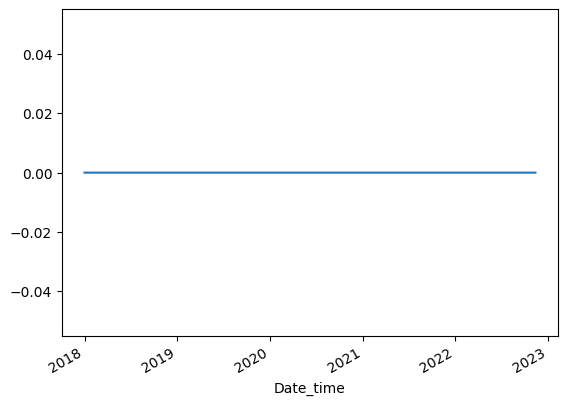

In [22]:
df2.Pollution_peak.plot()